In [ ]:
import random
random.randint(1,11)

2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_excel("/content/drive/MyDrive/Bases U/API_11_DS2_es_excel_v2_535024.xls", sheet_name="Data")

In [ ]:
data= data.drop(data.index[0:2])
data.columns = data.iloc[0]
data = data[1:].reset_index(drop=True)
data.columns = data.columns.astype(str)

##Índice de Gini

In [ ]:
data_gini= data[data["Indicator Name"]=="Índice de Gini"]
data_gini= data_gini[["Country Name","Indicator Name"]+[str(i+.0) for i in range(2010,2024)]]

In [ ]:
def predecir_valores_faltantes(df):
    df_copy = df.copy()
    años = df_copy.columns[3:]

    for idx, row in df_copy.iterrows():
        for col in años:
            if pd.isna(row[col]):
                años_disponibles = [float(año) for año in años if not pd.isna(row[año])]
                valores_disponibles = [row[año] for año in años if not pd.isna(row[año])]

                if len(años_disponibles) < 2:
                    continue

                model = LinearRegression()
                X = np.array(años_disponibles).reshape(-1, 1)
                y = np.array(valores_disponibles)
                model.fit(X, y)

                año_faltante = float(col[:-2])
                valor_predicho = model.predict([[año_faltante]])[0]

                df_copy.at[idx, col] = valor_predicho

    return df_copy
data_gini = predecir_valores_faltantes(data_gini)

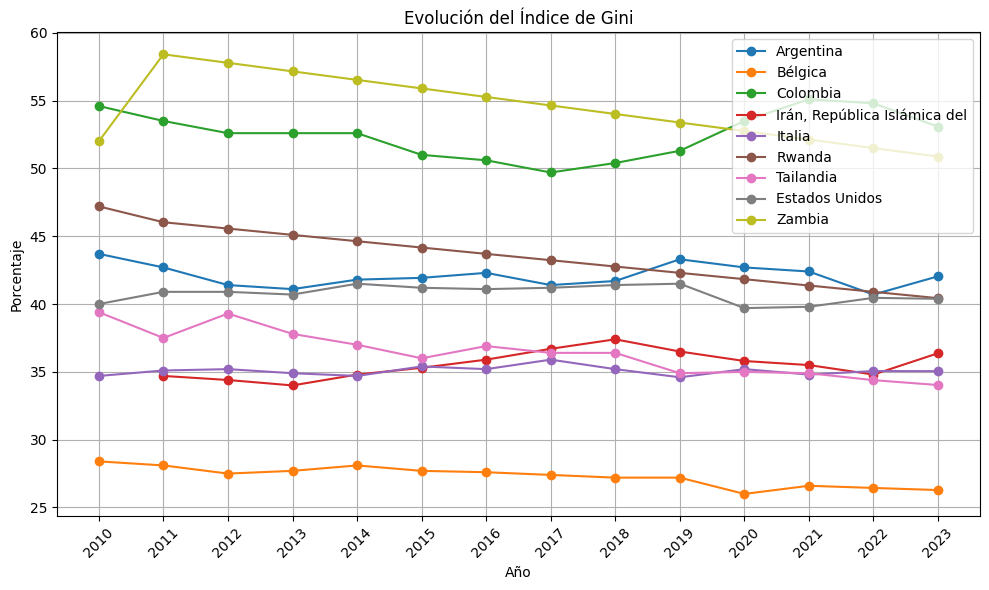

In [ ]:
paises_seleccionados=["Colombia", "Argentina","Estados Unidos", "Italia", "Bélgica", "Tailandia","Irán, República Islámica del","Rwanda","Zambia"]
datos_paises_seleccionados = data_gini[data_gini['Country Name'].isin(paises_seleccionados)]
años = datos_paises_seleccionados.columns[2:]
años_transformado = [int(float(year)) for year in años]

plt.figure(figsize=(10, 6))

for i, r in datos_paises_seleccionados.iterrows():
    pais = r['Country Name']
    valores = r[2:].values

    plt.plot(años_transformado, valores, marker='o', linestyle='-', label=pais)

plt.title('Evolución del Índice de Gini')
plt.xlabel('Año')
plt.ylabel('Porcentaje')
plt.grid(True)
plt.xticks(años_transformado, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


##Tasa de pobreza de 6,85 dólares al día

In [ ]:
data_pobreza= data[data["Indicator Name"]=="Tasa de pobreza de 6,85 dólares al día (PPA de 2017) (% de la población)"]
data_pobreza= data_pobreza[["Country Name","Indicator Name"]+[str(i+.0) for i in range(2010,2024)]]
data_pobreza

2,Country Name,Indicator Name,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
5,Aruba,"Tasa de pobreza de 6,85 dólares al día (PPA de...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,"Tasa de pobreza de 6,85 dólares al día (PPA de...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,Afganistán,"Tasa de pobreza de 6,85 dólares al día (PPA de...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,"Tasa de pobreza de 6,85 dólares al día (PPA de...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,Angola,"Tasa de pobreza de 6,85 dólares al día (PPA de...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5486,Kosovo,"Tasa de pobreza de 6,85 dólares al día (PPA de...",58.1,57.2,42.4,38.4,39.8,35.7,35.0,34.2,NaN,NaN,NaN,NaN,NaN,NaN
5507,"Yemen, Rep. del","Tasa de pobreza de 6,85 dólares al día (PPA de...",NaN,NaN,NaN,NaN,85.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5528,Sudáfrica,"Tasa de pobreza de 6,85 dólares al día (PPA de...",60.9,NaN,NaN,NaN,61.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5549,Zambia,"Tasa de pobreza de 6,85 dólares al día (PPA de...",92.5,NaN,NaN,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN,NaN,93.2,NaN


In [ ]:
def interpolar_valores_faltantes(df):
    df_copy = df.copy()
    años = df_copy.columns[3:]  # Obtener todas las columnas de años

    for idx, row in df_copy.iterrows():
        for col in años:
            if pd.isna(row[col]):
                # Filtrar los años disponibles para este país
                años_disponibles = [float(año) for año in años if not pd.isna(row[año])]
                valores_disponibles = [row[año] for año in años if not pd.isna(row[año])]

                # Verificar si hay suficientes datos para interpolar
                if len(años_disponibles) < 2:
                    continue  # Si hay menos de dos años con datos, no se puede interpolar

                # Interpolar el valor faltante
                año_faltante = float(col[:-2])
                valor_interpolado = np.interp(año_faltante, años_disponibles, valores_disponibles)

                # Asignar el valor interpolaado al DataFrame
                df_copy.at[idx, col] = valor_interpolado

    return df_copy

data_pobreza = interpolar_valores_faltantes(data_pobreza)

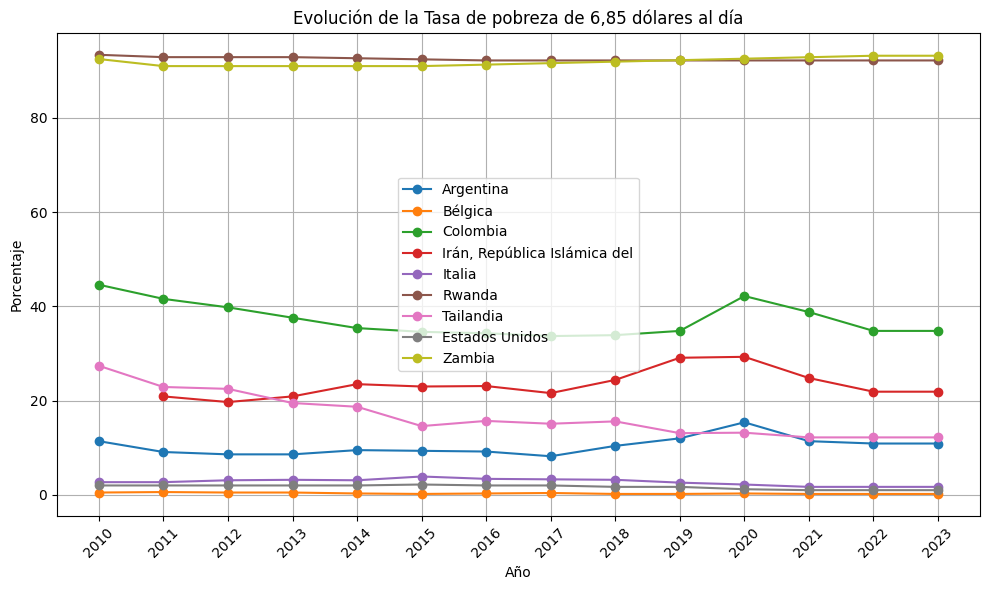

In [ ]:
paises_seleccionados=["Colombia", "Argentina","Estados Unidos", "Italia", "Bélgica", "Tailandia","Irán, República Islámica del","Rwanda","Zambia"]
datos_paises_seleccionados = data_pobreza[data_pobreza['Country Name'].isin(paises_seleccionados)]
años = datos_paises_seleccionados.columns[2:]
años_transformado = [int(float(year)) for year in años]

plt.figure(figsize=(10, 6))

for i, r in datos_paises_seleccionados.iterrows():
    pais = r['Country Name']
    valores = r[2:].values

    plt.plot(años_transformado, valores, marker='o', linestyle='-', label=pais)

plt.title('Evolución de la Tasa de pobreza de 6,85 dólares al día')
plt.xlabel('Año')
plt.ylabel('Porcentaje')
plt.grid(True)
plt.xticks(años_transformado, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


##Desigualdad Vs Pobreza (2010,2016,2022)

In [ ]:
mean_pobreza_iran = np.mean(data_pobreza.loc[data_pobreza["Country Name"] == "Irán, República Islámica del", '2011.0':'2023.0'].values)
data_pobreza.loc[data_pobreza["Country Name"] == "Irán, República Islámica del", '2010.0'] = mean_pobreza_iran

mean_gini_iran = np.mean(data_gini.loc[data_gini["Country Name"] == "Irán, República Islámica del", '2011.0':'2023.0'].values)
data_gini.loc[data_gini["Country Name"] == "Irán, República Islámica del", '2010.0'] = mean_gini_iran

In [ ]:
paises=["Colombia", "Argentina","Estados Unidos", "Italia", "Bélgica", "Tailandia","Irán, República Islámica del","Rwanda","Zambia"]
data_pobreza2= data_pobreza[data_pobreza['Country Name'].isin(paises)]
pobreza_año2010 = data_pobreza2["2010.0"]

data_gini2= data_gini[data_gini['Country Name'].isin(paises)]
data_gini2
gini2010 = data_gini2["2010.0"]
pais=data_gini2["Country Name"]

pobreza_año2010 = pobreza_año2010.reset_index(drop=True)
gini2010 = gini2010.reset_index(drop=True)
pais=pais.reset_index(drop=True)
indices2010 = pd.concat([pais,gini2010, pobreza_año2010], axis=1)

indices2010.columns = ['Country Name', 'Gini 2010', 'Pobreza 2010']

In [ ]:
indices2010

,Country Name,Gini 2010,Pobreza 2010
0,Argentina,43.700000,11.400000
1,Bélgica,28.400000,0.500000
2,Colombia,54.600000,44.600000
3,"Irán, República Islámica del",35.551865,23.392308
4,Italia,34.700000,2.700000
5,Rwanda,47.200000,93.400000
6,Tailandia,39.400000,27.400000
7,Estados Unidos,40.000000,2.000000
8,Zambia,52.000000,92.500000


In [ ]:
data_pobreza3= data_pobreza[data_pobreza['Country Name'].isin(paises)]
pobreza_año2016 = data_pobreza3["2016.0"]

data_gini3= data_gini[data_gini['Country Name'].isin(paises)]

gini2016 = data_gini3["2016.0"]
pais=data_gini3["Country Name"]

pobreza_año2016 = pobreza_año2016.reset_index(drop=True)
gini2016 = gini2016.reset_index(drop=True)
pais=pais.reset_index(drop=True)
indices2016 = pd.concat([pais,gini2016, pobreza_año2016], axis=1)
indices2016.columns = ['Country Name', 'Gini 2016', 'Pobreza 2016']

In [ ]:
data_pobreza4= data_pobreza[data_pobreza['Country Name'].isin(paises)]
pobreza_año2022 = data_pobreza3["2022.0"]

data_gini4= data_gini[data_gini['Country Name'].isin(paises)]

gini2022 = data_gini4["2022.0"]
pais=data_gini4["Country Name"]

pobreza_año2022 = pobreza_año2022.reset_index(drop=True)
gini2022 = gini2022.reset_index(drop=True)
pais=pais.reset_index(drop=True)
indices2022 = pd.concat([pais,gini2022, pobreza_año2022], axis=1)
indices2022.columns = ['Country Name', 'Gini 2022', 'Pobreza 2022']

Regresion 2010

Intersección: -98.18787254321722
Pendiente: 3.1462582703580697


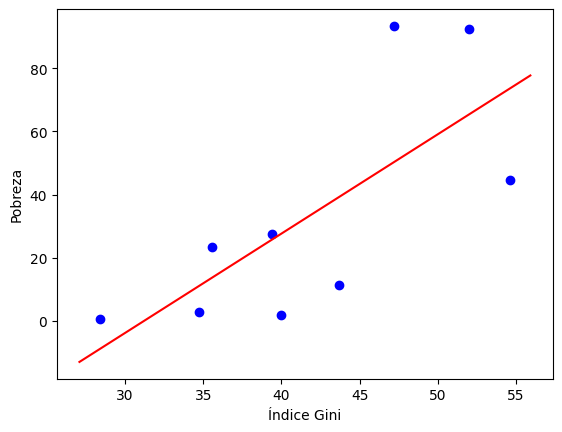

In [ ]:
regression = LinearRegression()

gini_modelo = indices2010["Gini 2010"].values.reshape((-1, 1))

modelo = regression.fit(gini_modelo, indices2010["Pobreza 2010"])

print("Intersección:", modelo.intercept_)
print("Pendiente:", modelo.coef_[0])

plt.ylabel("Pobreza")
plt.xlabel("Índice Gini")
plt.scatter(indices2010["Gini 2010"], indices2010["Pobreza 2010"], color="blue")

x_vals = np.array(plt.gca().get_xlim())
y_vals = modelo.intercept_ + modelo.coef_[0] * x_vals

plt.plot(x_vals, y_vals, color="red")

plt.show()

Regresión 2016

Intersección: -94.01093302015602
Pendiente: 3.032282472972803


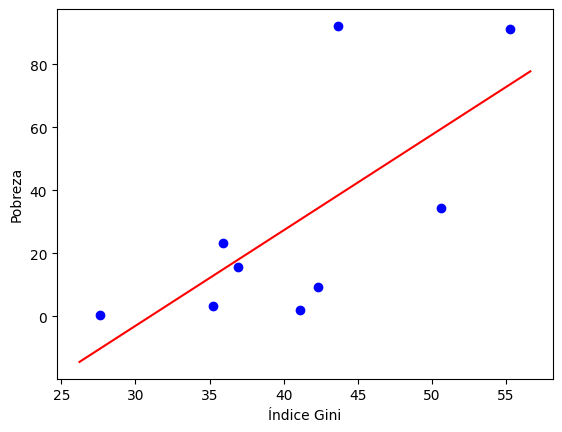

In [ ]:
regression = LinearRegression()

gini_modelo = indices2016["Gini 2016"].values.reshape((-1, 1))

modelo = regression.fit(gini_modelo, indices2016["Pobreza 2016"])

print("Intersección:", modelo.intercept_)
print("Pendiente:", modelo.coef_[0])

plt.ylabel("Pobreza")
plt.xlabel("Índice Gini")
plt.scatter(indices2016["Gini 2016"], indices2016["Pobreza 2016"], color="blue")

x_vals = np.array(plt.gca().get_xlim())
y_vals = modelo.intercept_ + modelo.coef_[0] * x_vals

plt.plot(x_vals, y_vals, color="red")

plt.show()

Regresión 2022

Intersección: -67.63455263783585
Pendiente: 2.442048834072432


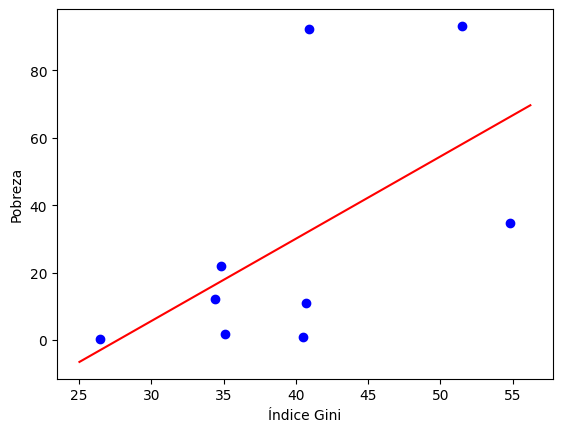

In [ ]:
regression = LinearRegression()
gini_modelo = indices2022["Gini 2022"].values.reshape((-1, 1))

modelo = regression.fit(gini_modelo, indices2022["Pobreza 2022"])

print("Intersección:", modelo.intercept_)
print("Pendiente:", modelo.coef_[0])

plt.ylabel("Pobreza")
plt.xlabel("Índice Gini")
plt.scatter(indices2022["Gini 2022"], indices2022["Pobreza 2022"], color="blue")

x_vals = np.array(plt.gca().get_xlim())
y_vals = modelo.intercept_ + modelo.coef_[0] * x_vals

plt.plot(x_vals, y_vals, color="red")

plt.show()

##Conclusiones:


* La gráfica muestra una correlación positiva entre el Índice de Gini y la tasa de pobreza, sugiriendo que a mayor desigualdad económica, mayor es la tasa de pobreza en los países analizados en 2010. Sin embargo, la dispersión de los puntos alrededor de la línea de regresión indica que, aunque existe esta tendencia general, hay una alta variabilidad que el modelo no explica completamente, lo que sugiere que otros factores también influyen en la tasa de pobreza y podrían requerir análisis adicionales para mejorar la precisión predictiva.<br>

* La gráfica del 2020 sigue mostrando una relación positiva entre el Índice de Gini y la tasa de pobreza, similar a la de 2010, donde un aumento en el nivel de desigualdad económica se asocia con un aumento en la pobreza. Sin embargo, la dispersión de los puntos alrededor de la línea de regresión sigue siendo alta, indicando que, aunque la tendencia general se mantiene, la variabilidad no explicada es considerable. Esto sugiere que el Índice de Gini por sí solo no es suficiente para predecir con precisión la tasa de pobreza, y es probable que otros factores adicionales influyan en los niveles de pobreza observados en 2020